**Import Libraries**

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')


**Read Dataset**


In [7]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
p = df[df.Outcome == 1]
n = df[df.Outcome == 0]

**Basic Visualization**

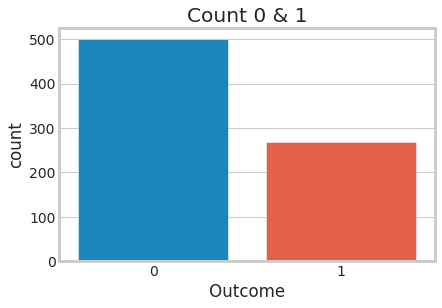

In [15]:
sns.set_style("whitegrid")  # Set style for seaborn plots
ax = sns.countplot(x='Outcome', data=df)
ax.set_title("Count 0 & 1")
plt.show()

**Exploratory Data Analysis**

In [16]:
print('Data Shape',df.shape)
print(df.info()) 
describe = df.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**Heatmap**

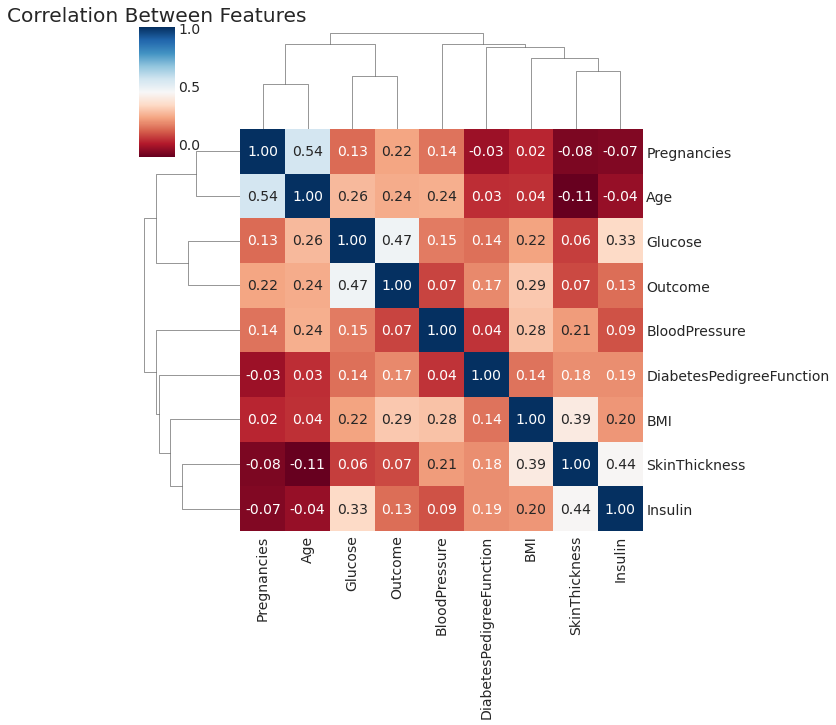

In [18]:
# Compute correlation matrix
corr_data = df.corr() 

# Plot clustered heatmap with annotations and custom color palette
sns.clustermap(corr_data, annot=True, fmt='.2f', cmap='RdBu')

# Set title and show plot
plt.title('Correlation Between Features')
plt.show();

**Boxplot of Feature Visualization**

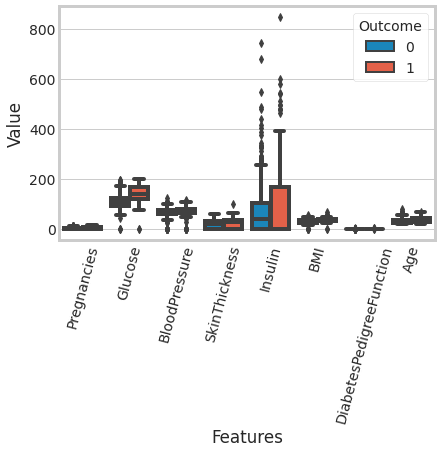

In [29]:
df_melted = pd.melt(df,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=df_melted) 
plt.xticks(rotation=75) 
plt.show()


In [30]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

**Analyzation of Diabetic Cases**

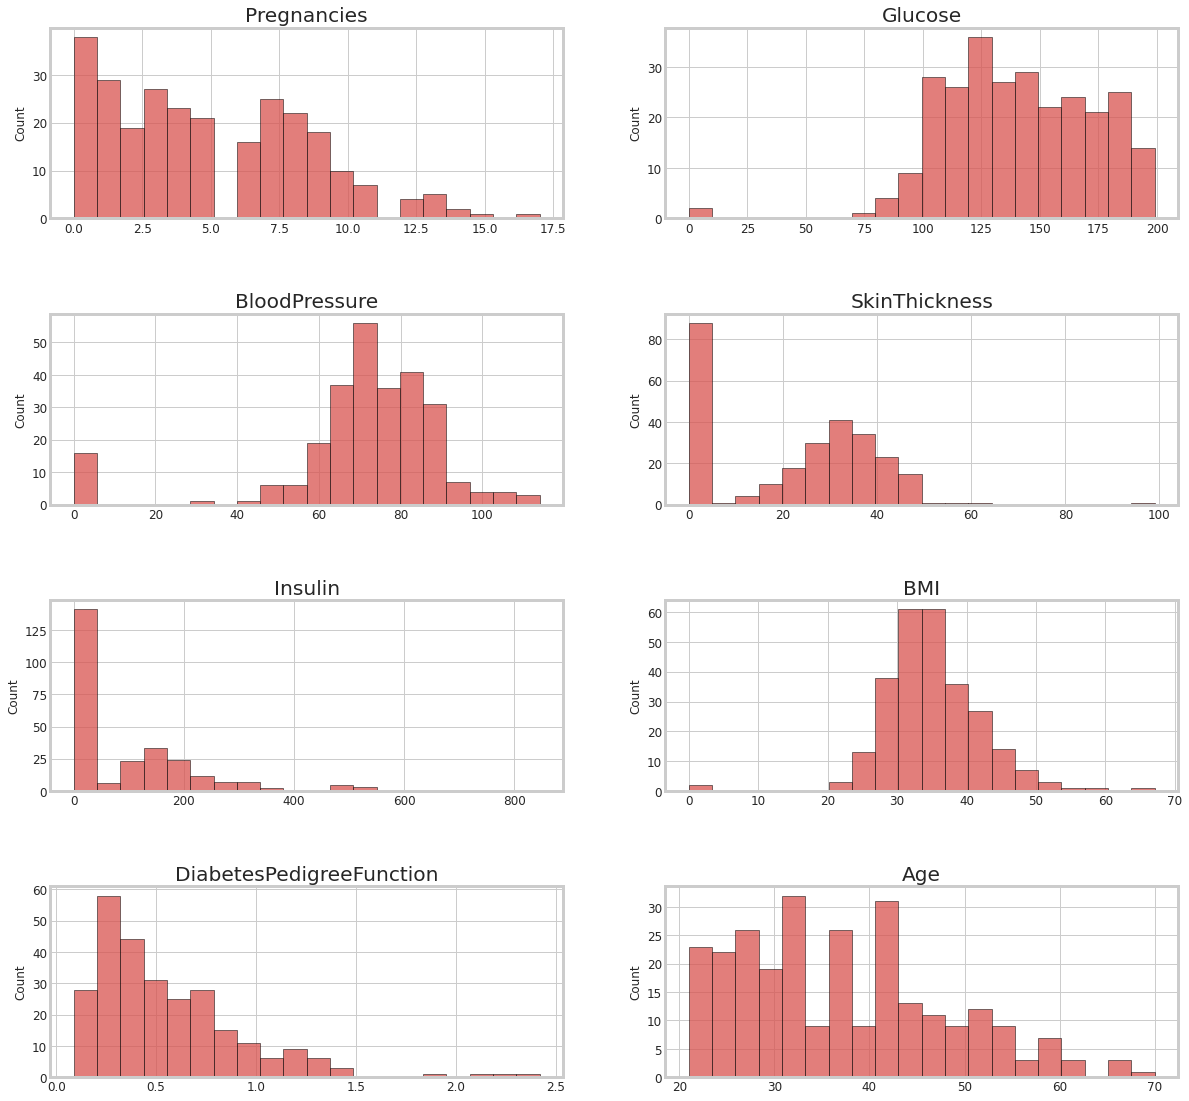

In [31]:
data1 = df[df["Outcome"] == 1]
columns = df.columns[:8]
fig, axes = plt.subplots(figsize=(18, 18), nrows=4, ncols=2)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

colors = ['#5cb85c', '#d9534f']

for i, ax in zip(columns, axes.flatten()):
    sns.histplot(data1[i], bins=20, kde=False, edgecolor='black', color=colors[1], ax=ax)
    ax.set_title(i)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_xlabel('')
    ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()

**Analyzation of Non-Diabetic Cases**

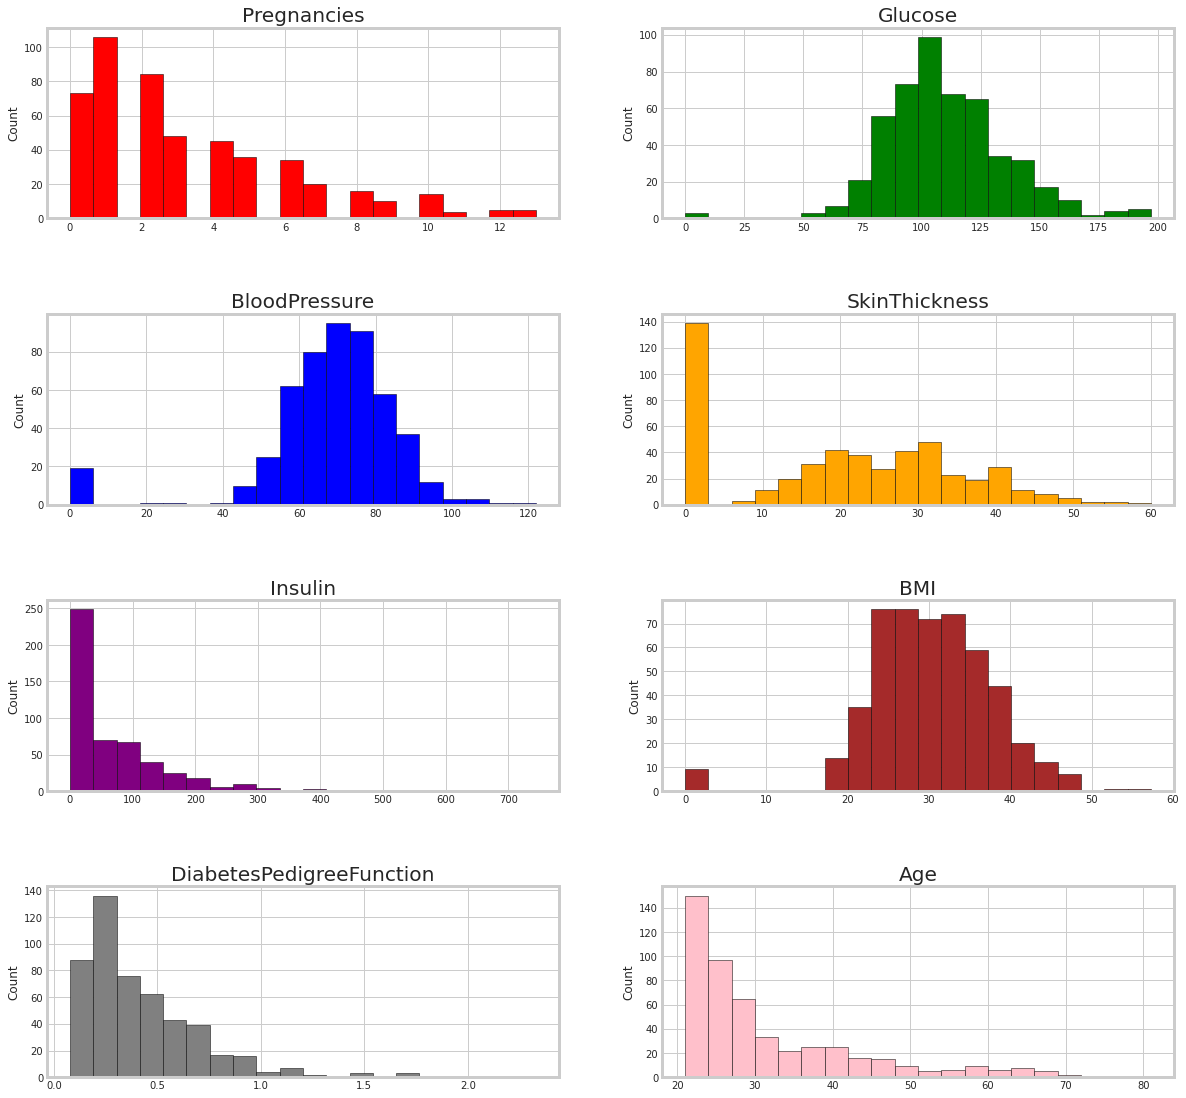

In [34]:
data1 = df[df["Outcome"] == 0]
columns = df.columns[:8]
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,18))
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'gray', 'pink']
for ax, col, color in zip(axes.flatten(), columns, colors):
    ax.hist(data1[col], bins=20, edgecolor='black', color=color)
    ax.set_title(col)
    ax.set_ylabel("Count", fontsize=12)
    ax.tick_params(labelsize=10)
fig.subplots_adjust(hspace=0.5)
plt.show()

**Visualization of Features**

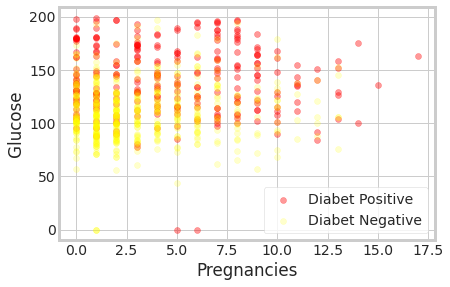

In [35]:
plt.scatter(p.Pregnancies,p.Glucose,color = "red",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "yellow",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()


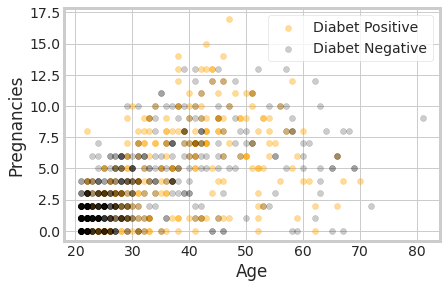

In [36]:
plt.scatter(p.Age,p.Pregnancies,color = "orange",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()


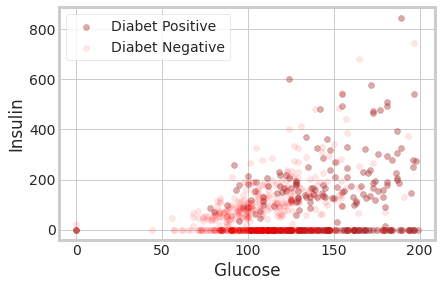

In [37]:
plt.scatter(p.Glucose,p.Insulin,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "red",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()
